# Online ads

In this problem set we analyse the relationship between online ads and purchase behavior. In particular, we want to classify which online users are likely to purchase a certain product after being exposed to an online ad.  

## Data preparation

In [27]:
import pandas as pd
df = pd

Wir schauen uns bei der Klassifikation an, wer in welcher Altersgruppe gekauft hat, um zu wissen wen wir spätere Kampagnen anzeigen. 

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/purchase.csv")
df

,Unnamed: 0,User ID,Gender,Age,EstimatedSalary,Purchased
0,1,15624510,Male,19,19000,0
1,2,15810944,Male,35,20000,0
2,3,15668575,Female,26,43000,0
3,4,15603246,Female,27,57000,0
4,5,15804002,Male,19,76000,0
...,...,...,...,...,...,...
395,396,15691863,Female,46,41000,1
396,397,15706071,Male,51,23000,1
397,398,15654296,Female,50,20000,1
398,399,15755018,Male,36,33000,0


In [29]:

df.to_csv("~/downloads/online-ads.csv")

In [30]:
df2 = pd.read_csv("~/downloads/online-ads.csv")

In [31]:
df['male'] = pd.get_dummies(df['Gender'], drop_first = False)

ValueError: Wrong number of items passed 2, placement implies 1

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [44]:
# make dummy variable
df['male'] = pd.get_dummies(df['Gender'], drop_first = True)

KeyError: 'Gender'

In [45]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [47]:
# drop irrelevant columns
df.drop(columns= ['Unnamed: 0', 'User ID', 'Gender'], inplace = True)

KeyError: "['Unnamed: 0' 'User ID' 'Gender'] not found in axis"

In [48]:
# inspect outcome variable
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [49]:
# prepara data for scikit learn 
X = df.drop(columns=['Purchased'])

y = df["Purchased"]

In [50]:
# make data split : Hier trainieren wir das Model: Mit diesen Daten versucht das Modell ein Muster zu erkennen -> Funktion macht für uns den Test 
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)
X_train

,Age,EstimatedSalary
39,27,31000
167,35,71000
383,49,28000
221,35,91000
351,37,75000
...,...,...
255,52,90000
72,20,23000
396,51,23000
235,46,79000


In [42]:
# create new training dataset for data exploration = Wir arbeiten nun an nur mit den Trainingsdaten 
train_dataset = pd.DataFrame(X_train).copy()
train_dataset

,Age,EstimatedSalary
39,27,31000
167,35,71000
383,49,28000
221,35,91000
351,37,75000
...,...,...
255,52,90000
72,20,23000
396,51,23000
235,46,79000


In [52]:
train_dataset['Purchased'] = pd.DataFrame(y_train)

In [53]:
train_dataset

,Age,EstimatedSalary,Purchased
39,27,31000,0
167,35,71000,0
383,49,28000,1
221,35,91000,1
351,37,75000,0
...,...,...,...
255,52,90000,1
72,20,23000,0
396,51,23000,1
235,46,79000,1


## Exploratory data analysis (EDA)

In [57]:
# group by burchased and show descriptive statistics
train_dataset.groupby(by=['Purchased']).describe().T

Purchased                          0              1
Age             count     185.000000      95.000000
                mean       32.621622      45.821053
                std         7.957603       8.756735
                min        18.000000      27.000000
                25%        27.000000      39.000000
                50%        33.000000      47.000000
                75%        38.000000      52.500000
                max        59.000000      60.000000
EstimatedSalary count     185.000000      95.000000
                mean    58556.756757   89505.263158
                std     22429.073482   43284.038059
                min     15000.000000   20000.000000
                25%     43000.000000   43500.000000
                50%     60000.000000   97000.000000
                75%     75000.000000  130000.000000
                max    134000.000000  150000.000000

Purchasers are (on average) older and earn a higher estimated salary than non-purchasers. 

Visualization of differences:

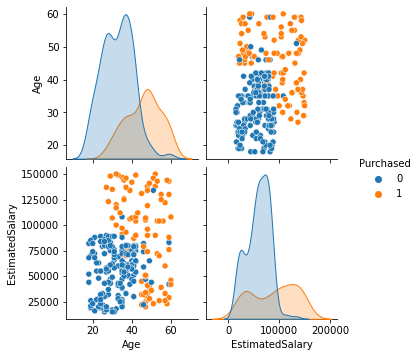

In [62]:
# show seaborn pair plot and show Purchased levels (use kind="reg" and diag_kind="kde") 
import seaborn as sns

sns.pairplot(data = train_dataset,hue= 'Purchased')

Inspect (linear) relationships between variables with correlation (pearson's correlation coefficient)

In [64]:
df.corr().round(2)

,Age,EstimatedSalary,Purchased
Age,1.00,0.16,0.62
EstimatedSalary,0.16,1.00,0.36
Purchased,0.62,0.36,1.00


Purchasers seem to be _________ than non-purchaser.

In [66]:
# show a boxplot for Age - use as x-axis variable male and show the difference for our label
sns.boxplot(y='Age', x='male', data=train_dataset)

ValueError: Could not interpret input 'male'

There are __________ differences regarding gender.

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

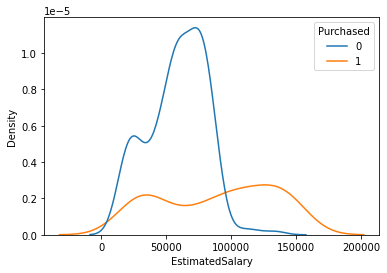

In [67]:
# Show an informative  kdeplot for EstimatedSalary 
sns.kdeplot(x='EstimatedSalary', hue='Purchased', data=train_dataset)

Purchaser earn a ______________ estimated salary.

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

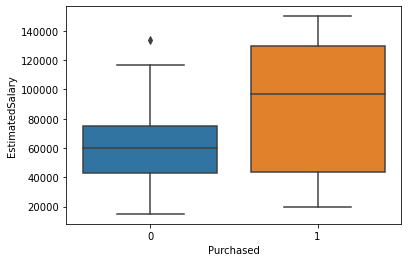

In [68]:
# Show an informative boxplot for EstimatedSalary 

sns.boxplot(y='EstimatedSalary', x='Purchased', data=train_dataset)

Insight: there are ___________ differences between males and females (regarding purchase behavior, age and estimated salary)

## Model

Next, we will fit a logistic regression model. We only use our most promising predictor variables `Age` and `EstimatedSalary` for our model.

In [69]:
# only use meaningful predictors
features_model = ['Age', 'EstimatedSalary']

In [73]:
 # damit können wir die Trainingsdatenvariablen eingrenzen 
 
 X_train =  X_train[features_model]


In [74]:
 X_test = X_test[features_model]

In [83]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

# model

In [84]:
# fit model to data mit den Trainingsdaten

clf.fit (X_train, y_train)

LogisticRegression()

In [88]:
# prediction 

y_pred = clf.predict(X_test)

y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Classification metrics

In [90]:
# Return the mean accuracy on the given test data and labels:

clf.score(X_test, y_test)

0.6

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay

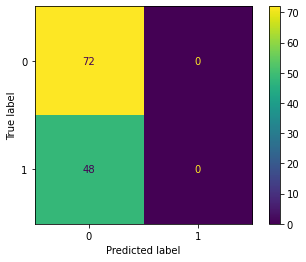

In [92]:
ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test)



In [101]:
from sklearn.metrics import classification_report

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        72
           1       0.00      0.00      0.00        48

    accuracy                           0.60       120
   macro avg       0.30      0.50      0.37       120
weighted avg       0.36      0.60      0.45       120



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


``macro``: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

``weighted``: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters 'macro' to account for label imbalance.

Note that recall is also sometimes called sensitivity or true positive rate.

* High scores for both *precision* and *recall* show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

* The importance of precision vs recall depends on the use case at hand (and the costs associated with missclassification). 

* A system with *high recall* but *low precision* returns many results, but most of its predicted labels are incorrect when compared to the training labels. 

* A system with *high precision* but *low recall* is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. 
  
* An ideal system with high precision and high recall will return many results, with most results labeled correctly. 

The unweighted recall of our model is _____  

The unweighted precision of our model is _____  

### ROC Curve

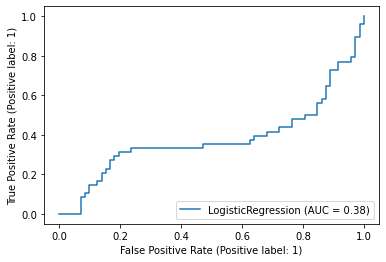

In [102]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X_test, y_test) 



### AUC Score


In [103]:
from sklearn.metrics import roc_auc_score

y_score = clf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_score)

0.38078703703703703